In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_14_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_14_3.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 130, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/130
100000/100000 - 3s - loss: 0.3103 - accuracy: 0.8685 - val_loss: 0.2315 - val_accuracy: 0.9011
Epoch 2/130
100000/100000 - 2s - loss: 0.2236 - accuracy: 0.9045 - val_loss: 0.2175 - val_accuracy: 0.9053
Epoch 3/130
100000/100000 - 2s - loss: 0.2110 - accuracy: 0.9079 - val_loss: 0.2085 - val_accuracy: 0.9076
Epoch 4/130
100000/100000 - 2s - loss: 0.2034 - accuracy: 0.9105 - val_loss: 0.2022 - val_accuracy: 0.9104
Epoch 5/130
100000/100000 - 2s - loss: 0.1972 - accuracy: 0.9137 - val_loss: 0.1959 - val_accuracy: 0.9146
Epoch 6/130
100000/100000 - 2s - loss: 0.1905 - accuracy: 0.9171 - val_loss: 0.1936 - val_accuracy: 0.9147
Epoch 7/130
100000/100000 - 2s - loss: 0.1815 - accuracy: 0.9218 - val_loss: 0.1818 - val_accuracy: 0.9217
Epoch 8/130
100000/100000 - 2s - loss: 0.1693 - accuracy: 0.9272 - val_loss: 0.1696 - val_accuracy: 0.9275
Epoch 9/130
100000/100000 - 2s - loss: 0.1559 - accuracy: 0.9316 - val_loss: 0.1531 - val_accu

Epoch 77/130
100000/100000 - 2s - loss: 0.0384 - accuracy: 0.9859 - val_loss: 0.0675 - val_accuracy: 0.9786
Epoch 78/130
100000/100000 - 2s - loss: 0.0374 - accuracy: 0.9860 - val_loss: 0.0721 - val_accuracy: 0.9785
Epoch 79/130
100000/100000 - 2s - loss: 0.0380 - accuracy: 0.9860 - val_loss: 0.0705 - val_accuracy: 0.9778
Epoch 80/130
100000/100000 - 2s - loss: 0.0383 - accuracy: 0.9858 - val_loss: 0.0719 - val_accuracy: 0.9770
Epoch 81/130
100000/100000 - 2s - loss: 0.0392 - accuracy: 0.9855 - val_loss: 0.0714 - val_accuracy: 0.9784
Epoch 82/130
100000/100000 - 2s - loss: 0.0364 - accuracy: 0.9867 - val_loss: 0.0670 - val_accuracy: 0.9798
Epoch 83/130
100000/100000 - 2s - loss: 0.0371 - accuracy: 0.9862 - val_loss: 0.0686 - val_accuracy: 0.9785
Epoch 84/130
100000/100000 - 2s - loss: 0.0374 - accuracy: 0.9862 - val_loss: 0.0679 - val_accuracy: 0.9791
Epoch 85/130
100000/100000 - 2s - loss: 0.0370 - accuracy: 0.9864 - val_loss: 0.0664 - val_accuracy: 0.9792
Epoch 86/130
100000/100000 -

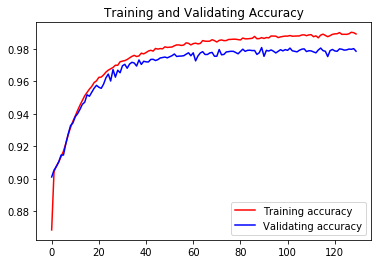

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_14_3_model.h5')